<a href="https://colab.research.google.com/github/egynzhu-personal/siop-python-seminar-2024/blob/main/04_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirements

In [1]:
!pip3 install -q -U bitsandbytes==0.42.0
!pip3 install -q -U peft==0.8.2
!pip3 install -q -U trl==0.7.10
!pip3 install -q -U accelerate
# !pip install -i https://pypi.org/simple/ bitsandbytes
!pip3 install -q -U datasets==2.17.0
!pip3 install -q -U transformers==4.38.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 MB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.4/183.4 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.9/150.9 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.0/102.0 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.6/536.6 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 62.9 MB/s eta 0:00:00


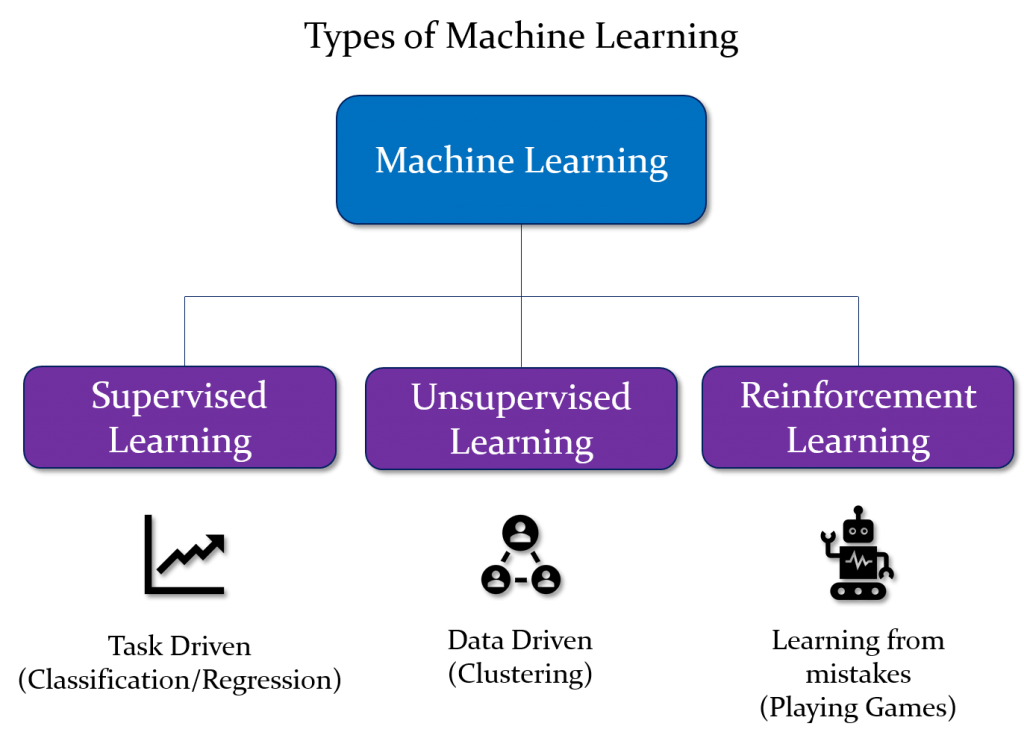

# Classification
## Predict a categorical outcome
## For example:
1. performance (low,high)
2. turnover (regrettable, non-regrettable, other)
3. potential (low, medium, high)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd

In [3]:
!wget -O prod_data.csv https://raw.githubusercontent.com/egynzhu-personal/siop-python-seminar-2024/main/data/production_staff.csv
df = pd.read_csv('prod_data.csv', on_bad_lines='skip')


--2024-04-17 21:03:22--  https://raw.githubusercontent.com/egynzhu-personal/siop-python-seminar-2024/main/data/production_staff.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34966 (34K) [text/plain]
Saving to: ‘prod_data.csv’

prod_data.csv       100%[===================>]  34.15K  --.-KB/s    in 0.002s  

2024-04-17 21:03:22 (13.4 MB/s) - ‘prod_data.csv’ saved [34966/34966]



## Production Employee Data
- Target (Outcome Variable): Performance Score

In [4]:
df.head()

,Employee Name,Race Desc,Date of Hire,TermDate,Reason for Term,Employment Status,Department,Position,Pay,Manager Name,Performance Score,Abutments/Hour Wk 1,Abutments/Hour Wk 2,Daily Error Rate,90-day Complaints
0,"Albert, Michael",White,8/1/2011,NaN,N/A - still employed,Active,Production,Production Manager,$54.50,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0
1,"Bozzi, Charles",Asian,9/30/2013,8/7/2014,retiring,Voluntarily Terminated,Production,Production Manager,$50.50,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0
2,"Butler, Webster L",White,1/28/2016,NaN,N/A - still employed,Active,Production,Production Manager,$55.00,Elisa Bramante,Exceeds,0.0,0.0,0.0,0.0
3,"Dunn, Amy",White,9/18/2014,NaN,N/A - still employed,Active,Production,Production Manager,$51.00,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0
4,"Gray, Elijiah",White,6/2/2015,NaN,N/A - still employed,Active,Production,Production Manager,$54.00,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0


In [5]:
len(df)

256

## Typical Workflow

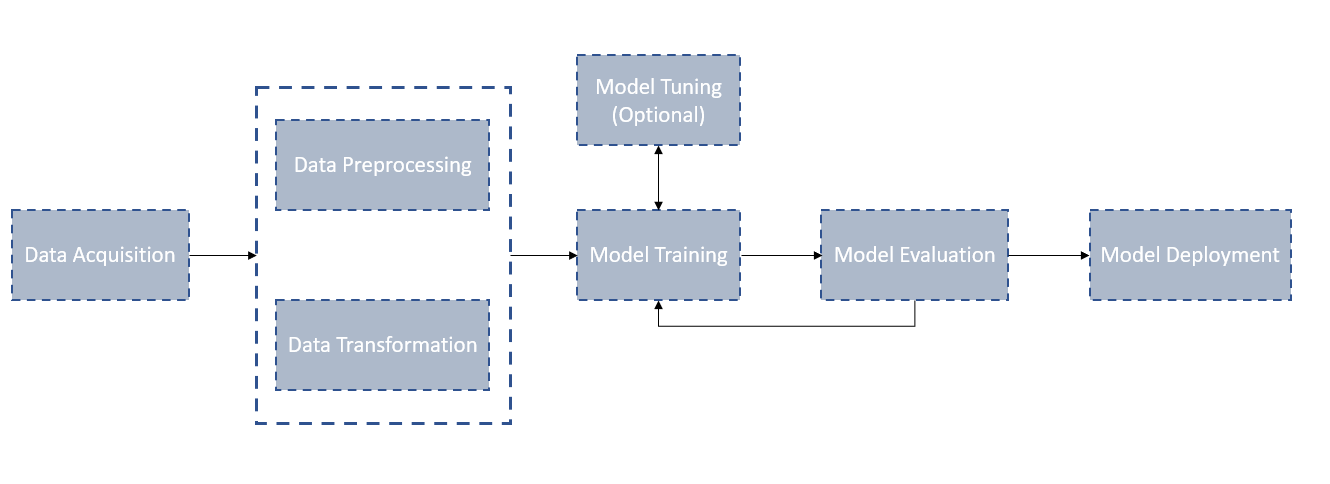

## Preprocessing
- Prepare the data for modeling
- Remove features (input variables)
- Drop nas
- Binarize hire date
- Clean pay feature
- Binarize target (outcome variable)

In [6]:
# simplify the dataset
# of course, this may need deep consideration in practice

df.drop(['Race Desc', 'Employee Name', 'TermDate', 'Reason for Term', 'Employment Status'], inplace = True, axis = 1)

In [7]:
# drop nas
# in practice there are several considerations, e.g., the amount of missingess and the source of missingness
df.dropna(inplace = True)

In [8]:
len(df)

208

In [9]:
# let's binarize data of hire

df['Date of Hire'] = pd.to_datetime(df['Date of Hire'])
df['Date of Hire'] = df['Date of Hire'].apply(lambda x: 0 if x.year <= 2011 else 1)
df.head()

,Date of Hire,Department,Position,Pay,Manager Name,Performance Score,Abutments/Hour Wk 1,Abutments/Hour Wk 2,Daily Error Rate,90-day Complaints
0,0,Production,Production Manager,$54.50,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0
1,1,Production,Production Manager,$50.50,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0
2,1,Production,Production Manager,$55.00,Elisa Bramante,Exceeds,0.0,0.0,0.0,0.0
3,1,Production,Production Manager,$51.00,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0
4,1,Production,Production Manager,$54.00,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0


In [10]:
# clean pay column
df['Pay'] = df['Pay'].replace('[\$,]', '', regex=True).astype(float)

In [11]:
# gather X and y
X = df.drop('Performance Score', axis = 1)
y = df['Performance Score'].map({
    'Fully Meets': 1,
    'N/A- too early to review': 0,
    'Exceeds': 1,
    '90-day meets': 1,
    'Needs Improvement': 0,
    'PIP': 0,
    'Exceptional': 1
})

In [12]:
y.value_counts()

Performance Score
1    165
0     43
Name: count, dtype: int64

In [13]:
X.head()

,Date of Hire,Department,Position,Pay,Manager Name,Abutments/Hour Wk 1,Abutments/Hour Wk 2,Daily Error Rate,90-day Complaints
0,0,Production,Production Manager,54.5,Elisa Bramante,0.0,0.0,0.0,0.0
1,1,Production,Production Manager,50.5,Elisa Bramante,0.0,0.0,0.0,0.0
2,1,Production,Production Manager,55.0,Elisa Bramante,0.0,0.0,0.0,0.0
3,1,Production,Production Manager,51.0,Elisa Bramante,0.0,0.0,0.0,0.0
4,1,Production,Production Manager,54.0,Elisa Bramante,0.0,0.0,0.0,0.0


In [14]:
y.values[0:5]

array([1, 1, 1, 1, 1])

## In order to examine model performance, we create a train test split

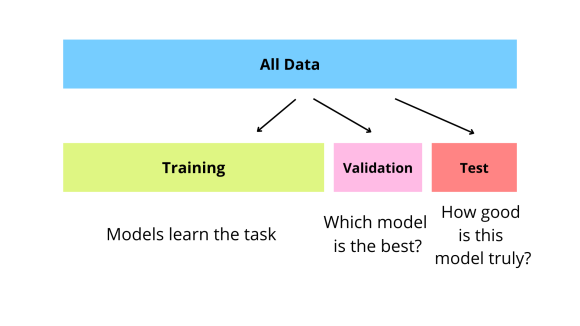

In [15]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Encode Data
- Some models prefer float/integer input variables (features)
- One hot enoding: convert categorical features to numerical
 - Flag 1 if the value is present

In [16]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# identify categorical features
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']

# Perform one-hot encoding on categorical features
one_hot_encoder = OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore')
X_train_encoded = one_hot_encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = one_hot_encoder.transform(X_test[categorical_cols])


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [17]:
# Get feature names after one-hot encoding
feature_names = one_hot_encoder.get_feature_names_out(categorical_cols)

# Create DataFrames with appropriate column names
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=feature_names, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=feature_names, index=X_test.index)

# Combine encoded features with numerical features
X_train_final = pd.concat([X_train.drop(columns=categorical_cols), X_train_encoded_df], axis=1)
X_test_final = pd.concat([X_test.drop(columns=categorical_cols), X_test_encoded_df], axis=1)

# Optional, we already converted it to int
# Encode target variable into integer
# label_encoder = LabelEncoder()

# Fit and transform on training data
# y_train_encoded = label_encoder.fit_transform(y_train)
# y_test_encoded = label_encoder.transform(y_test)


In [18]:
X_train_final

,Date of Hire,Pay,Abutments/Hour Wk 1,Abutments/Hour Wk 2,Daily Error Rate,90-day Complaints,Position_Production Technician I,Position_Production Technician II,Manager Name_Brannon Miller,Manager Name_David Stanley,Manager Name_Elijiah Gray,Manager Name_Elisa Bramante,Manager Name_Kelley Spirea,Manager Name_Ketsia Liebig,Manager Name_Kissy Sullivan,Manager Name_Michael Albert,Manager Name_Webster Butler
86,1,17.0,13.0,14.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
203,0,23.0,12.0,13.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
67,1,24.0,11.0,10.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
82,0,22.0,5.0,7.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
205,1,22.0,18.0,17.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1,16.0,16.0,16.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14,0,20.0,15.0,17.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
92,1,15.0,5.0,6.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
179,1,28.0,15.0,14.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier


In [20]:
decision_tree = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
decision_tree.fit(X_train_final, y_train)

# Predict the labels of the test set
y_pred = decision_tree.predict(X_test_final)

## Interpreting Performance
- Accuracy - Percentage of correctly predicted instances out of all instances.
Precision - Ratio of correctly predicted positive observations to the total predicted positives.
- Recall (Sensitivity) - Ratio of correctly predicted positive observations to the all observations in actual class.
- F1 Score - Harmonic mean of precision and recall, useful when the classes are imbalanced.
- Support - Number of actual occurrences of the class in the specified dataset.

In [21]:
# Print the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Generating and printing the classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6190476190476191

Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.25      0.20         8
           1       0.80      0.71      0.75        34

    accuracy                           0.62        42
   macro avg       0.48      0.48      0.48        42
weighted avg       0.68      0.62      0.65        42



## Optimizing hyperparameters using K-Folds Cross Validation
### Hyperparameters are model settings that influence performance
1. Split all data into training data and test data
2. Split training into k-datasets
3. Each fold gets a chance to be training data and test data
4. Vary hyperparameters, find the optimal performance



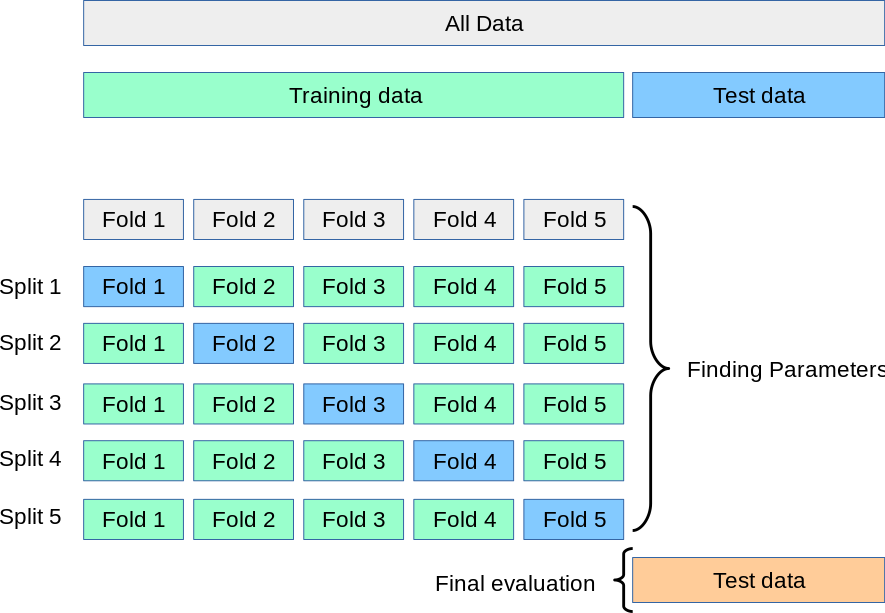

In [22]:
from sklearn.model_selection import GridSearchCV, train_test_split
import numpy as np

In [23]:
from itertools import product

# Set the parameters for the grid search

param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': np.arange(5, 101, 10).tolist() + [None],  # from 5 to 100 in steps of 5, plus None
    'min_samples_split': np.arange(2, 10, 2).tolist(),  # from 2 to 20 in steps of 2
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'random_state': [42]
}


# Calculate the number of combinations
num_combinations = len(list(product(*param_grid.values())))

print(f"Number of combinations: {num_combinations}")

Number of combinations: 2112


In [24]:
dt = DecisionTreeClassifier()

In [25]:
# set k
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', verbose =1, n_jobs=-1)

In [26]:
%%time

grid_search.fit(X_train_final, y_train)

Fitting 5 folds for each of 2112 candidates, totalling 10560 fits
CPU times: user 3.69 s, sys: 177 ms, total: 3.87 s
Wall time: 1min 8s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 15, 25, 35, 45, 55, 65, 75, 85, 95,
                                       None],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 4, 6, 8],
                         'random_state': [42], 'splitter': ['best', 'random']},
             scoring='accuracy', verbose=1)

In [27]:
# this is our best estimator
best_dt = grid_search.best_estimator_

In [28]:
# Predict on the testing data
y_pred = best_dt.predict(X_test_final)

In [29]:
# Print the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print the classification report
print("Classification report for the best Decision Tree model:")
print(classification_report(y_test, y_pred))

# Optionally, print the best parameters found
print("Best parameters found:", grid_search.best_params_)

Accuracy: 0.7380952380952381
Classification report for the best Decision Tree model:
              precision    recall  f1-score   support

           0       0.33      0.38      0.35         8
           1       0.85      0.82      0.84        34

    accuracy                           0.74        42
   macro avg       0.59      0.60      0.59        42
weighted avg       0.75      0.74      0.74        42

Best parameters found: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 8, 'random_state': 42, 'splitter': 'best'}


# HuggingFace and Natural Language Processing (NLP)
## Unstructured text data is ubiquitious, NLP allows us to do several things with textual data
1. Classification - predict categorical outcomes (e.g., sentiment)
2. Regression - predict continous outcomes (e.g., compentencies)
3. Search/question answering - answer domain relevant questions from many documents
4. Chatbots - conversational bots (e.g., HR bots, people analytics knowledge, interview bot)

## Model Access
1. Authorize the consent form here: https://huggingface.co/google/gemma-1.1-2b-it
2. Create an access token: https://huggingface.co/settings/tokens
3. Be sure to connect to GPU! Runtime > Change runtime type > select a gpu

## Authenticate your HF Account

In [37]:
from huggingface_hub import notebook_login
notebook_login()

In [38]:
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig


# Load Alpaca dataset
# this dataset was created by Stanford to train assistant LLMs
# https://huggingface.co/datasets/tatsu-lab/alpaca
# Alpaca is a dataset of 52,000 instructions and demonstrations generated by
# OpenAI's text-davinci-003 engine. This instruction data can be used to conduct instruction-tuning for
# language models and make the language model follow instruction better.

dataset = load_dataset("tatsu-lab/alpaca")


In [39]:
dataset

DatasetDict({
    train: Dataset({
        features: ['instruction', 'input', 'output', 'text'],
        num_rows: 52002
    })
})

In [40]:
import torch

# load quantized model
quantization_config = BitsAndBytesConfig(load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16)

tokenizer = AutoTokenizer.from_pretrained("google/gemma-1.1-2b-it")
model = AutoModelForCausalLM.from_pretrained(
    "google/gemma-1.1-2b-it",
    quantization_config=quantization_config,
    device_map = {"":0}
)



tokenizer_config.json:   0%|          | 0.00/34.2k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/618 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/13.5k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/67.1M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/132 [00:00<?, ?B/s]

In [41]:
# LORA config
# only train a small portion of the model

from peft import LoraConfig

lora_config = LoraConfig(
    r=4,
    target_modules=["q_proj", "o_proj", "k_proj", "v_proj", "gate_proj", "up_proj", "down_proj"],
    task_type="CAUSAL_LM",
)

In [42]:
# prepare data in the style that is accepted by the model

def formatting_func(example):
    text = f"<start_of_turn>user\n{example['instruction'][0]} {example['input'][0]} <end_of_turn> <start_of_turn>model\n{example['output'][0]}<end_of_turn>"
    return [text]

In [43]:
import transformers
from trl import SFTTrainer

trainer = SFTTrainer(
    model=model,
    train_dataset=dataset["train"],
    args=transformers.TrainingArguments(
        per_device_train_batch_size=1,
        gradient_accumulation_steps=4,
        warmup_steps=2,
        num_train_epochs=1,
        learning_rate=2e-4,
        fp16=True,
        logging_steps=1,
        output_dir="outputs",
        optim="paged_adamw_8bit"
    ),
    peft_config=lora_config,
    formatting_func=formatting_func,
)

/usr/local/lib/python3.10/dist-packages/trl/trainer/sft_trainer.py:223: UserWarning: You didn't pass a `max_seq_length` argument to the SFTTrainer, this will default to 1024
  warnings.warn(


Map:   0%|          | 0/52002 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/trl/trainer/sft_trainer.py:290: UserWarning: You passed a tokenizer with `padding_side` not equal to `right` to the SFTTrainer. This might lead to some unexpected behaviour due to overflow issues when training a model in half-precision. You might consider adding `tokenizer.padding_side = 'right'` to your code.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [44]:
trainer.train()

Step,Training Loss
1,7.557500
2,7.144800
3,6.233700
4,7.683800
5,8.071000
6,6.544700
7,4.392300
8,6.385200
9,5.111100
10,6.597100


TrainOutput(global_step=13, training_loss=6.236544535710261, metrics={'train_runtime': 19.128, 'train_samples_per_second': 2.771, 'train_steps_per_second': 0.68, 'total_flos': 58256578031616.0, 'train_loss': 6.236544535710261, 'epoch': 0.98})

## Test the model


In [49]:
text = """<start_of_turn>user
Help me brainstorm what to eat for breakfast. <end_of_turn>
<start_of_turn>model"""
device = "cuda:0"
inputs = tokenizer(text, return_tensors="pt").to(device)

outputs = model.generate(**inputs, max_new_tokens=50)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

In [46]:
# notice that we may need to increase the number of max tokens

text = """<start_of_turn>user
Explain how the brain works simply <end_of_turn>
<start_of_turn>model"""
device = "cuda:0"
inputs = tokenizer(text, return_tensors="pt").to(device)

outputs = model.generate(**inputs, max_new_tokens=100)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

# Activity: Train a decision tree to predict attrition on the dataset provided below
## Recommended Steps:
1. Load the data
2. Clean the data (e.g., remove missing rows or impute missing values w/mean)
3. Train test split the data using sklearn
4. Convert categorical columns as needed
5. Fit the model (you can use GridsearchCV and hyperparameter tuning, or just fit the model)
6. Evaluate the performance using sklearn's classification report

In [47]:
# recommended libraries

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [48]:
!wget -O hr_data.csv https://raw.githubusercontent.com/egynzhu-personal/siop-python-seminar-2024/main/data/hr_data.csv

df = pd.read_csv('hr_data.csv')
df.head()

NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968